В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?


Решение должно представлять собой IPython-ноутбук, содержащий:

код, генерирующий выборки и графики;
краткие описания каждого блока кода, объясняющие, что он делает;
необходимые графики (убедитесь, что на них подписаны оси);
выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
выводы по результатам выполнения задания.

#### Распределение Log-logistic (Fisk distribution)
[Описание на WIKI](https://en.wikipedia.org/wiki/Log-logistic_distribution)

[Библиотека SCIPY](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisk.html#scipy.stats.fisk)


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import fisk
import scipy.stats as sts

In [2]:
#сгенерируйте 1000 Выбор параметров для распределения = 5
n = 5
Gen_Vibor = fisk.rvs(n, size=1000)

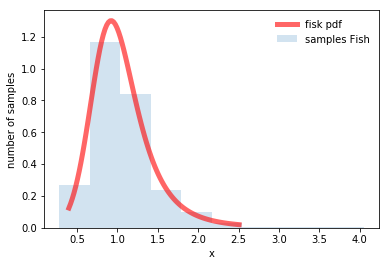

In [3]:
#постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины
fig, ax = plt.subplots(1, 1)
plt.hist(Gen_Vibor, density=True, histtype='stepfilled', alpha=0.2, label='samples Fish')
plt.ylabel('number of samples')
plt.xlabel('x')
x = np.linspace(fisk.ppf(0.01, n),fisk.ppf(0.99, n), 100)
plt.plot(x, fisk.pdf(x, n),'r-', lw=5, alpha=0.6, label='fisk pdf')
plt.legend(loc='best', frameon=False)



In [4]:
def FunctionFisk (Viborka):
    Gen = np.array([fisk.rvs(n, size=Viborka) for x in range (1000) ])
    meanVal = Gen.mean(axis = 1)
    plt.hist(meanVal, normed=True, alpha=0.5, label='hist mean n ' + str(Viborka))
    Ex = fisk.mean(n)
    std = fisk.std(n)
    Dx = std**2
    sig = math.sqrt(Dx/Viborka)
    print('Количество элементов: {} \nМатожидание: {}\n среднее {}' 
      '\nДисперсия: {}\nСигма: {}'.format(len(Gen), Ex,sig , Dx, sig))
    norm_rv = sts.norm(loc=Ex, scale=sig)
    x = np.linspace(0.5,2,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, 'r-', lw=3, alpha=0.7, label='fisk pdf n ' + str(Viborka))
    plt.ylabel('samples')
    plt.xlabel('x')
    plt.legend(loc='best')


#### Выборка обьема 5

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Количество элементов: 1000 
Матожидание: 1.068959332115595
 среднее 0.18901446820845788
Дисперсия: 0.17863234596063068
Сигма: 0.18901446820845788


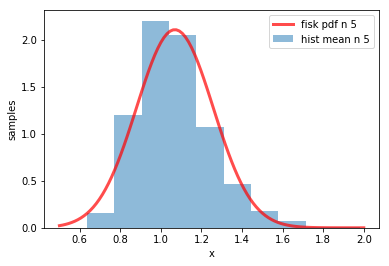

In [5]:
FunctionFisk(5)


#### Выборка обьема 10

Количество элементов: 1000 
Матожидание: 1.068959332115595
 среднее 0.13365341221256968
Дисперсия: 0.17863234596063068
Сигма: 0.13365341221256968


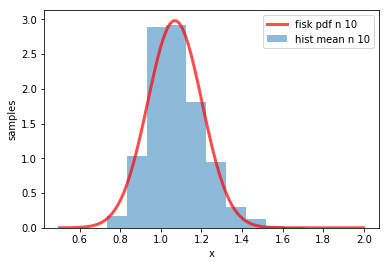

In [144]:
FunctionFisk(10)


#### Выборка обьема 50


Количество элементов: 1000 
Матожидание: 1.068959332115595
 среднее 0.05977162302642127
Дисперсия: 0.17863234596063068
Сигма: 0.05977162302642127


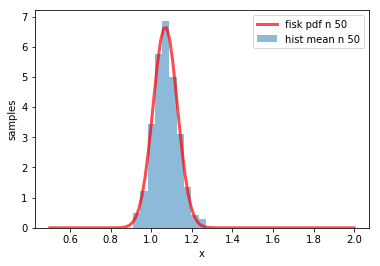

In [145]:
FunctionFisk(50)

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

#### Чем больше n тем точнее апроксимация распределения.